# White Dwarf initial-final mass relation

Figure 8.12 from Chapter 8 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge 
University Press.

Relation between the initial mass of a star with $0.85 M_\odot < M_{\rm init} < 7.5 M_\odot$ and its 
final mass as a white dwarf using data from Cummings et al. [2018, ApJ, 866, 21](https://ui.adsabs.harvard.edu/abs/2018ApJ...866...21C), Table 1.

We plot the initial masses from the PARSEC isochrones against the observed final masses.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig8_12.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## White dwarf mass data

Data are from Cummings et al. 2018, Table 1.  We converted the online journal ASCII table into a simpler
machine-readable form for this notebook, but preserved all data.

Two data points with M<sub>init</sub>$>$7.5M<sub>sun</sub> are commented out to preserve the complete table,
but follow Cummings et al. of only considering data between 0.85 and 7.5M<sub>sun</sub>.

Read in M<sub>init</sub> computed from the PARSEC isochronies which has asymmetric error bars,
and the final mass M<sub>final</sub> which has a symmetric error bar.

In [3]:
dataFile = f'WD_Mf_Mi_Cummings2018_Table1.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
M_i = np.array(data['M_iP'])
errMi_p = np.array(data['eMiPp'])
errMi_m = np.array(data['eMiPm'])
errMi = [errMi_m,errMi_p]

M_f = np.array(data['M_f'])
errMf = np.array(data['errMf'])

# Approximate line fit

fitMi = np.array([0.8,7.5])
fitMf = 0.1*fitMi + 0.46

# Plotting limits

minMi = 0.0 # Msun
maxMi = 8.0
minMf = 0.4 # Msun
maxMf = 1.4

## White Dwarf initial vs. final mass plot

We plot 
 * M<sub>init</sub> from the PARSEC ischrones
 * M<sub>final</sub> measured for each white dwarf
 
Points are plotted with symmetric errors in M<sub>final</sub> and asymmetric errors in M<sub>init</sub>.

A simple line fit of $M_{final} \approx 0.1 M_{init} + 0.46 M_\odot$ is plotted as a
dashed line.

Finally, since the text uses white dwarf Sirius B as an examplar, we plot it individually with a larger
marker filled with white to distinguish it.

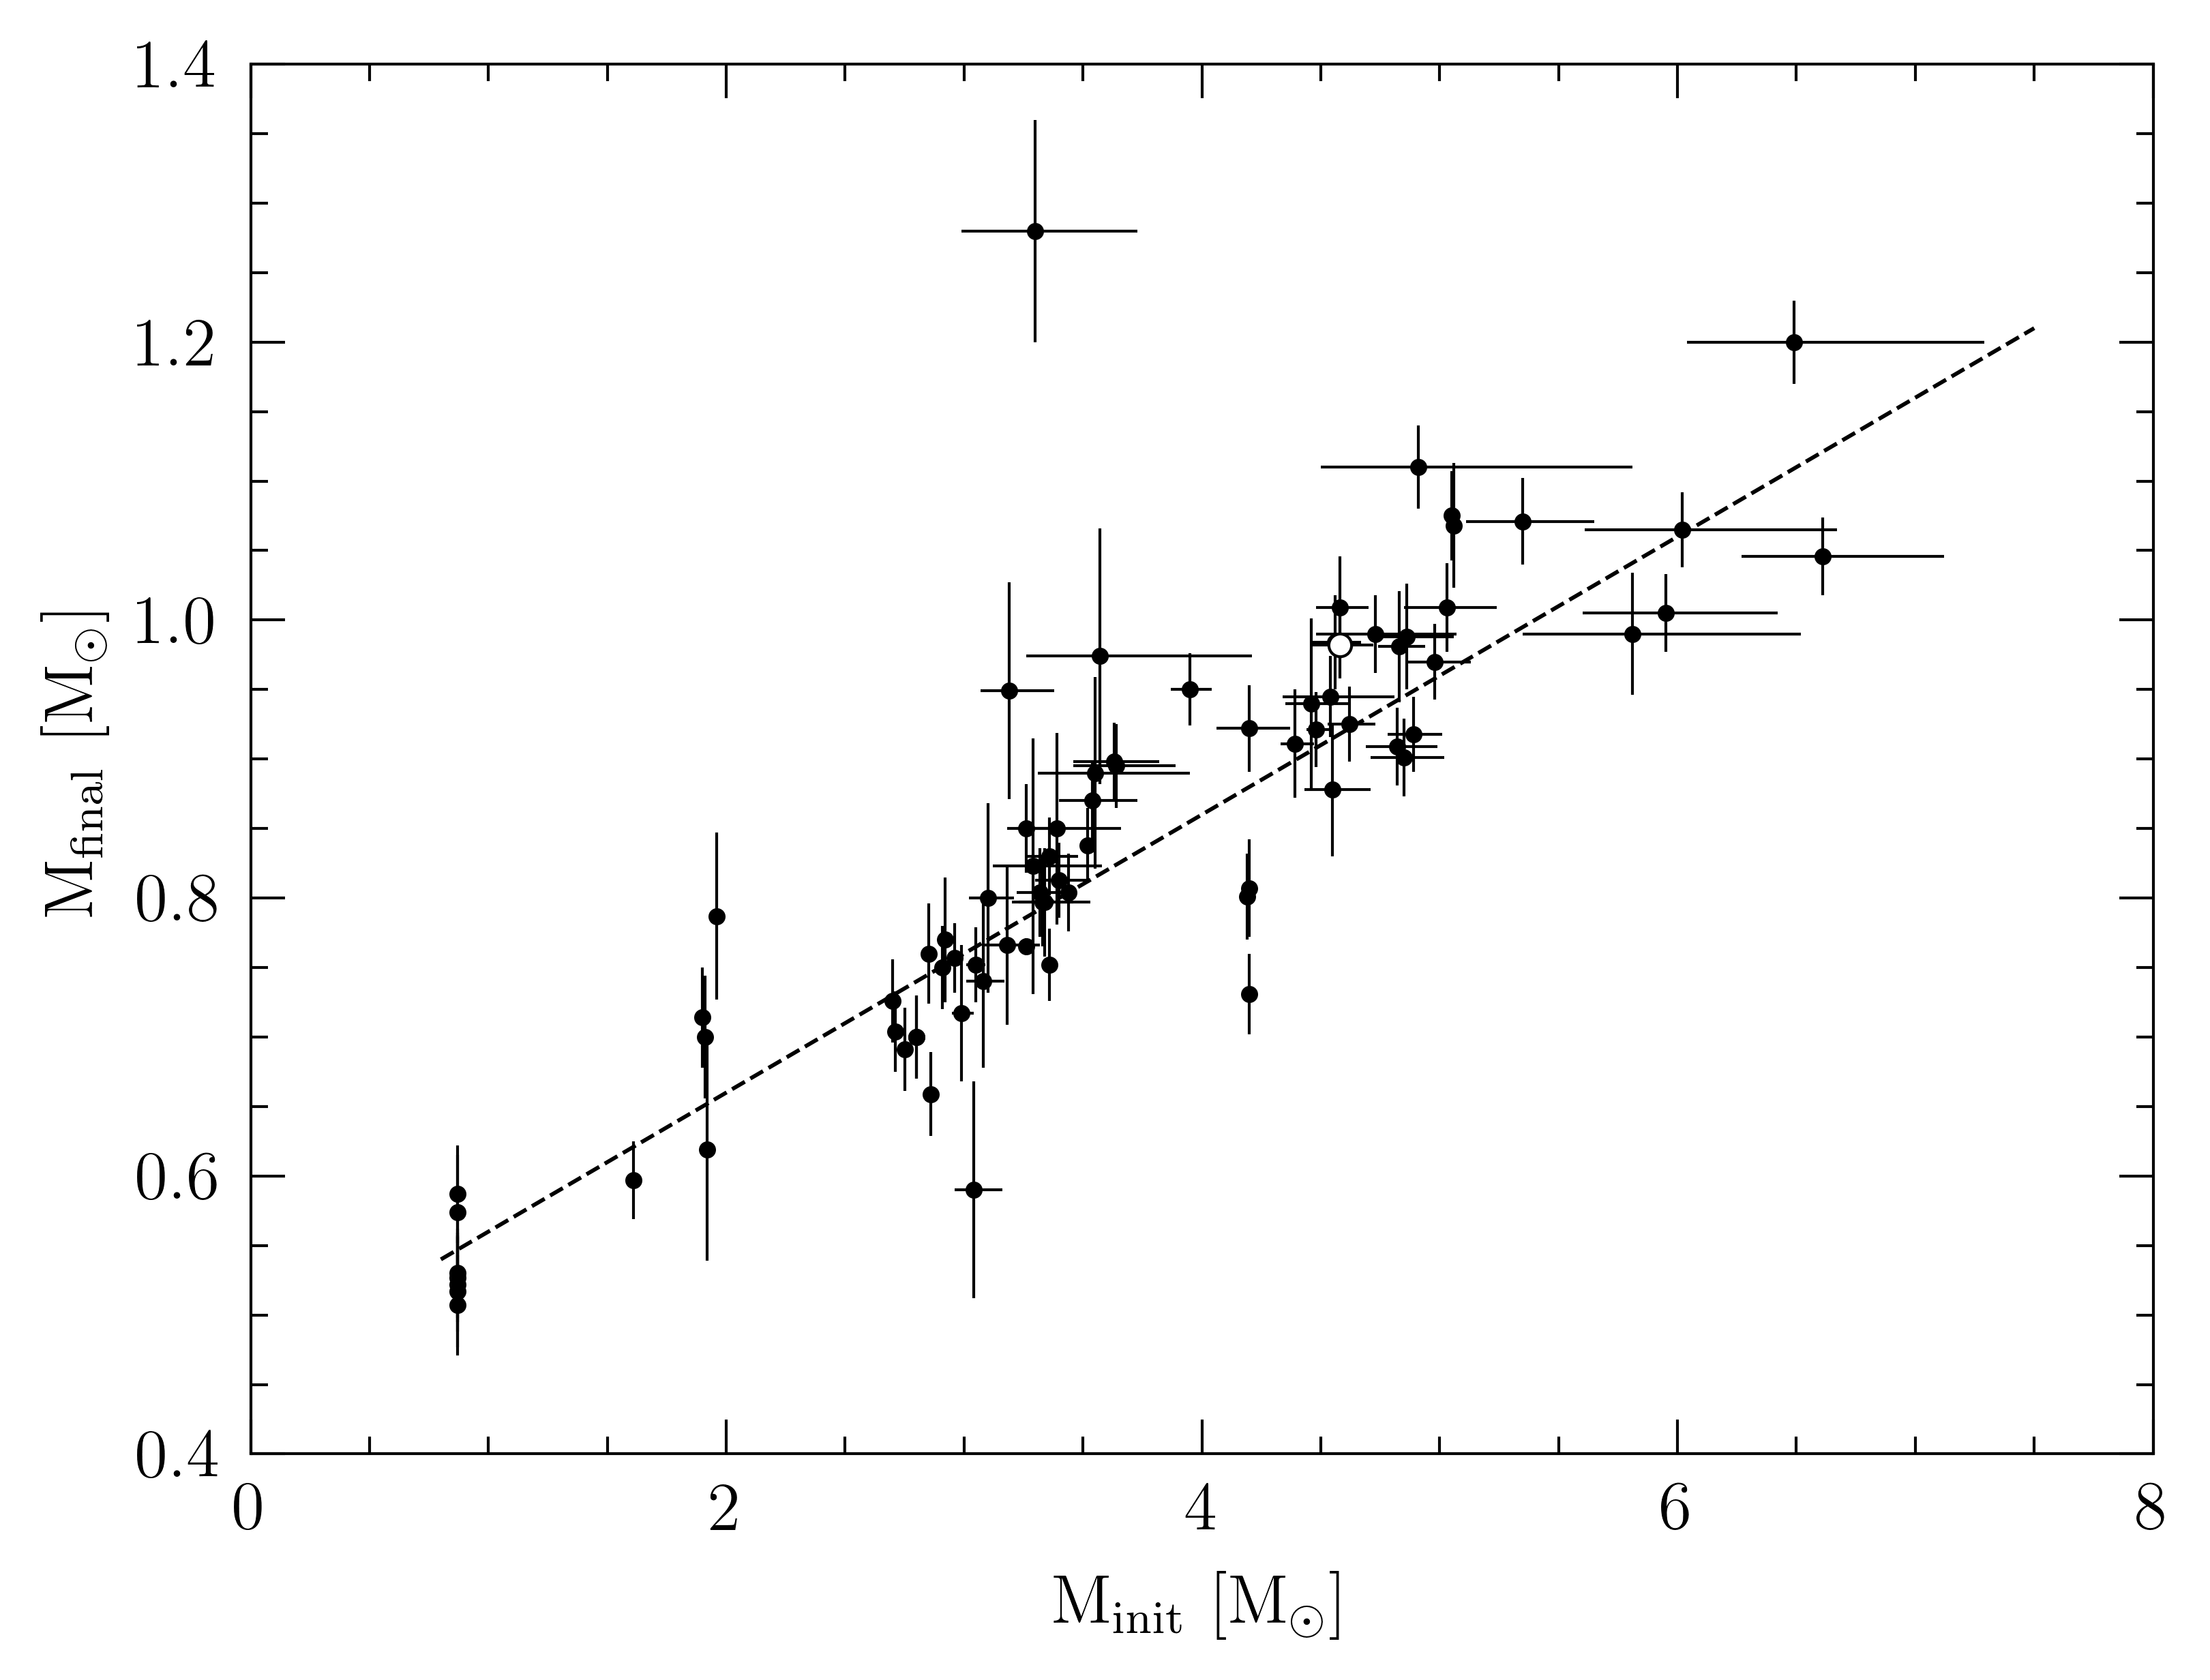

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(minMi,maxMi)
ax.set_xlabel(r'M$_{\rm init}$ [M$_\odot$]',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylim(minMf,maxMf)
ax.set_ylabel(r'M$_{\rm final}$ [M$_\odot$]',fontsize=axisFontSize)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.errorbar(M_i,M_f,fmt='o',marker='o',mfc='black',mew=0,ms=3,ls=None,yerr=errMf,xerr=errMi,
            ecolor='black',elinewidth=0.5,zorder=8)

# Sirius B - Mi=4.58 Mf=0.982 - as a slightly larger white point

ax.plot(4.58,0.982,marker='o',ms=4,mfc='white',mec='black',mew=0.5,zorder=10)

# Approximate line fit

ax.plot(fitMi,fitMf,'--',color='black',lw=0.7, zorder=4)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')